In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

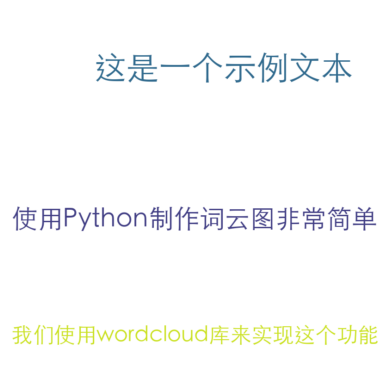

In [112]:
text = "这是一个示例文本。使用Python制作词云图非常简单。我们使用wordcloud库来实现这个功能。"
# 生成词云对象
wordcloud = WordCloud(font_path="/System/Library/Fonts/STHeiti Light.ttc", background_color="white", width=800, height=800).generate(text)

# 显示词云图
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [113]:
import pandas as pd
import jieba.analyse
zbj_result = pd.read_csv("../data/zbj_bert_result.csv", encoding="gb18030")
pos = zbj_result[zbj_result['label'] == 1]
pos 

,内容,label
0,八戒，陪你玩了7年了，感觉你现在眼里除了钱就是钱，我们像是被你锁在笼子里开膛破肚取胆汁的月熊...,1
25,祝猪八戒早日凉凉,1
45,我们公司是猪八戒网长期客户了，这次八八节才下单几项服务，今年活动力度太大了,1
46,在猪八戒网上找服务的人还是蛮多的，服务种类多，可供选择性强。,1
47,服务有保障，值得信任,1
...,...,...
1165,您好，您可以去猪八戒网寻求工作。 ...,1
1182,猪八戒网值得信赖。但是一些不法分子打着猪八戒网的名义进行欺诈，大家要小心，谨防上当受骗。另外...,1
1188,猪八戒大法好，人人爱之 遵守贴吧协议及“七条底线”,1
1190,猪八戒网加油 \n ...,1


In [114]:
# 定义提取关键词的函数
def extract_keywords(text, top_k=5, min_occurrences=10):
    all_keywords = jieba.analyse.extract_tags(text, topK=top_k)
    filtered_keywords = [kw for kw in all_keywords if text.count(kw) >= min_occurrences]
    return filtered_keywords

# 对评论列进行关键词提取
min_occurrences = 4  # 自定义最小出现次数
pos['keywords'] = pos['内容'].apply(lambda x: extract_keywords(x, min_occurrences=min_occurrences))
pos

/var/folders/r9/mzznhfxn6f1_pk872fmn29080000gr/T/ipykernel_98042/2850735262.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['keywords'] = pos['内容'].apply(lambda x: extract_keywords(x, min_occurrences=min_occurrences))


,内容,label,keywords
0,八戒，陪你玩了7年了，感觉你现在眼里除了钱就是钱，我们像是被你锁在笼子里开膛破肚取胆汁的月熊...,1,[]
25,祝猪八戒早日凉凉,1,[]
45,我们公司是猪八戒网长期客户了，这次八八节才下单几项服务，今年活动力度太大了,1,[]
46,在猪八戒网上找服务的人还是蛮多的，服务种类多，可供选择性强。,1,[]
47,服务有保障，值得信任,1,[]
...,...,...,...
1165,您好，您可以去猪八戒网寻求工作。 ...,1,[]
1182,猪八戒网值得信赖。但是一些不法分子打着猪八戒网的名义进行欺诈，大家要小心，谨防上当受骗。另外...,1,[]
1188,猪八戒大法好，人人爱之 遵守贴吧协议及“七条底线”,1,[]
1190,猪八戒网加油 \n ...,1,[]


In [115]:
pos_keywords = []
for kw in pos['keywords']:
    pos_keywords.extend(kw)
# pos_keywords_list = jieba.analyse.extract_tags(' '.join(pos_keywords), topK=50)
print(len(pos_keywords))

177


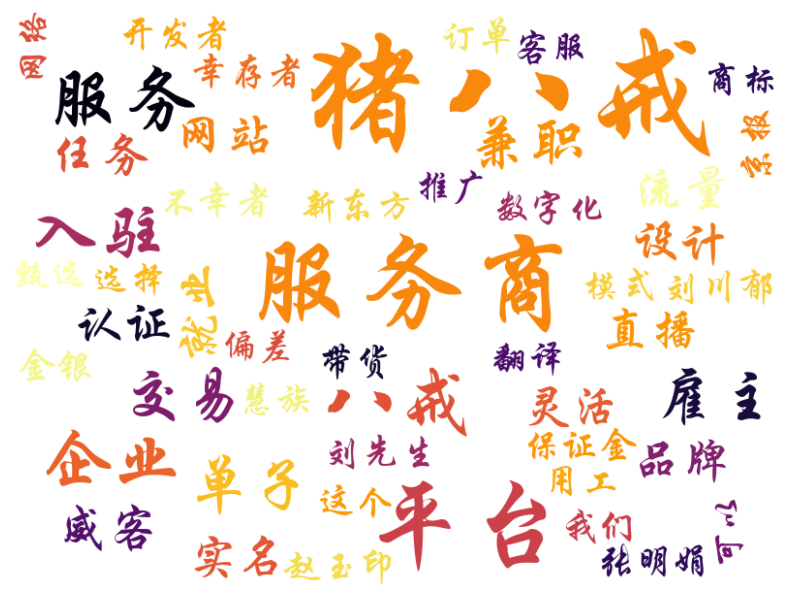

In [116]:
pos_text = ' '.join(pos_keywords)
wordcloud = WordCloud(font_path='/Users/link/Public/Fonts/STXingkai.ttf',  # 指定字体文件路径，例如：'simsun.ttf'（如果需要显示中文）
                      background_color='white',  # 设置背景颜色
                      width=800, height=600,  # 设置词云图的大小
                      max_words=50,  # 设置最多显示的词汇数量
                      colormap='inferno',  # 设置配色方案
                      min_font_size=10,  # 设置最小字号
                      max_font_size=150,  # 设置最大字号
                      random_state=42,  # 设置随机种子以获得相同的输出
                      ).generate(pos_text)
# 显示词云图
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [117]:
neg = zbj_result[zbj_result['label'] == 0]
neg['keywords'] = neg['内容'].apply(lambda x: extract_keywords(x, min_occurrences=min_occurrences))
neg

/var/folders/r9/mzznhfxn6f1_pk872fmn29080000gr/T/ipykernel_98042/2579001289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['keywords'] = neg['内容'].apply(lambda x: extract_keywords(x, min_occurrences=min_occurrences))


,内容,label,keywords
1,哎 现在想进入其实不是好时候了,0,[]
2,打算进去做推广 看见现在这版面 直接退出了,0,[]
3,猪八戒已经不是以前的猪八戒，唯利是图,0,[]
4,是的..猪八戒现在就是个LJ...我也离开了...以前还是挺感激猪八戒的..也赚到了第一桶金...,0,[..]
5,我干八戒四年了，现在看到八戒也很恶心，就是希望十天后一万的保证金能退出来！以后别恶心我们服务商了！,0,[]
...,...,...,...
1197,然后细心看了一下那个雇主的任务，所有交稿的人都不合格！！虽然没去看其他人的稿子有没有用过，但...,0,[]
1198,我又看了看这个人的资料，他提出的需求中，别人交稿的基本上没几个是合格的。所以说，这个人骗人已...,0,[]
1199,所以，建议大家在猪八戒做任务的时候注意一些无良雇主。第一，不要看着价格高点儿就做，有些时候很...,0,[]
1200,自言自语了这么多，说出来就舒坦些了。但愿对大家有些帮助，谨防骗子！！！,0,[]


In [118]:
neg_keywords = []
for kw in neg['keywords']:
    neg_keywords.extend(kw)
# pos_keywords_list = jieba.analyse.extract_tags(' '.join(pos_keywords), topK=50)
print(len(neg_keywords))

139


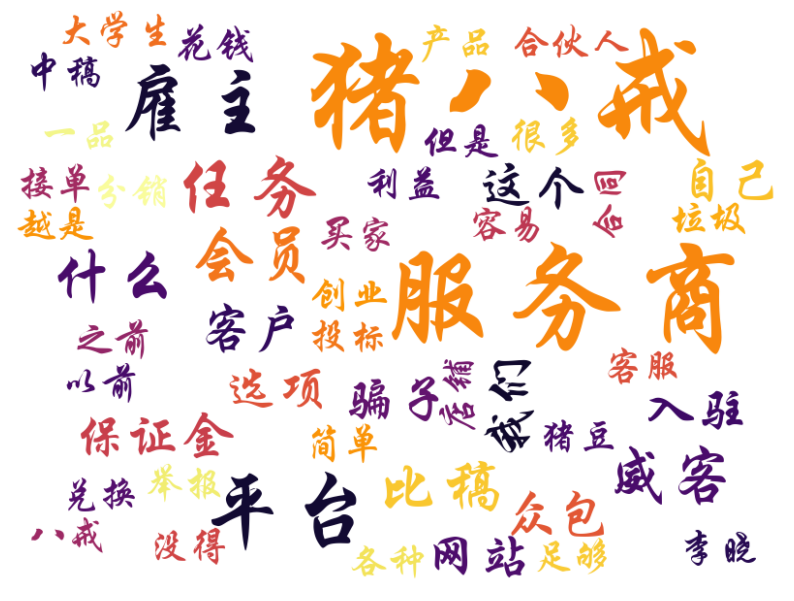

In [119]:
neg_keywords = []
for kw in neg['keywords']:
    neg_keywords.extend(kw)
# neg_keywords_list = jieba.analyse.extract_tags(' '.join(neg_keywords), topK=50)
neg_text = ' '.join(neg_keywords)
wordcloud = WordCloud(font_path='/Users/link/Public/Fonts/STXingkai.ttf',  # 指定字体文件路径，例如：'simsun.ttf'（如果需要显示中文）
                      background_color='white',  # 设置背景颜色
                      width=800, height=600,  # 设置词云图的大小
                      max_words=50,  # 设置最多显示的词汇数量
                      colormap='inferno',  # 设置配色方案
                      min_font_size=10,  # 设置最小字号
                      max_font_size=150,  # 设置最大字号
                      random_state=42,  # 设置随机种子以获得相同的输出
                      ).generate(neg_text)
# 显示词云图
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.show()

In [120]:
zbj_result

,内容,label
0,八戒，陪你玩了7年了，感觉你现在眼里除了钱就是钱，我们像是被你锁在笼子里开膛破肚取胆汁的月熊...,1
1,哎 现在想进入其实不是好时候了,0
2,打算进去做推广 看见现在这版面 直接退出了,0
3,猪八戒已经不是以前的猪八戒，唯利是图,0
4,是的..猪八戒现在就是个LJ...我也离开了...以前还是挺感激猪八戒的..也赚到了第一桶金...,0
...,...,...
1197,然后细心看了一下那个雇主的任务，所有交稿的人都不合格！！虽然没去看其他人的稿子有没有用过，但...,0
1198,我又看了看这个人的资料，他提出的需求中，别人交稿的基本上没几个是合格的。所以说，这个人骗人已...,0
1199,所以，建议大家在猪八戒做任务的时候注意一些无良雇主。第一，不要看着价格高点儿就做，有些时候很...,0
1200,自言自语了这么多，说出来就舒坦些了。但愿对大家有些帮助，谨防骗子！！！,0


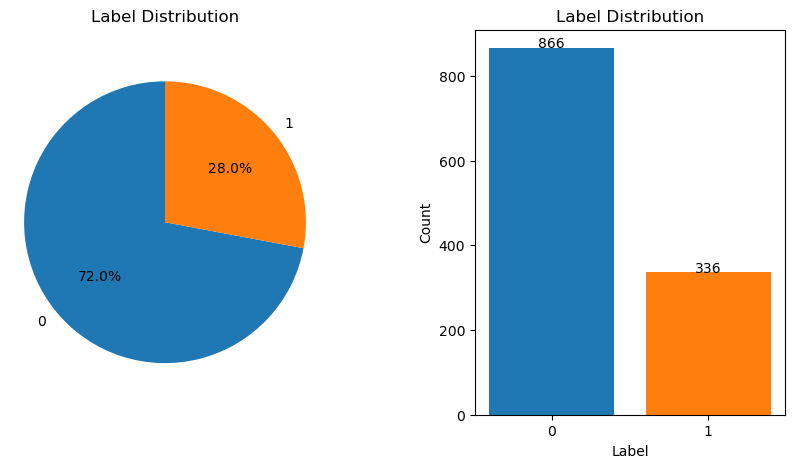

In [121]:
label_counts = zbj_result['label'].value_counts()
# 绘制饼图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # 保证饼图是一个圆形

# 添加图标题
ax1.set_title('Label Distribution')

color_dict = {'0': 'tab:blue', '1': 'tab:orange'}

for label, count in label_counts.items():
    label = str(label)
    ax2.bar(label, count, color=color_dict[label])
    
ax2.set_title('Label Distribution')
ax2.set_xlabel('Label')
ax2.set_ylabel('Count')
for i, v in enumerate(label_counts):
    ax2.text(i, v+1, str(v), ha='center')
plt.subplots_adjust(wspace=0.5)
# 显示图形
plt.show()

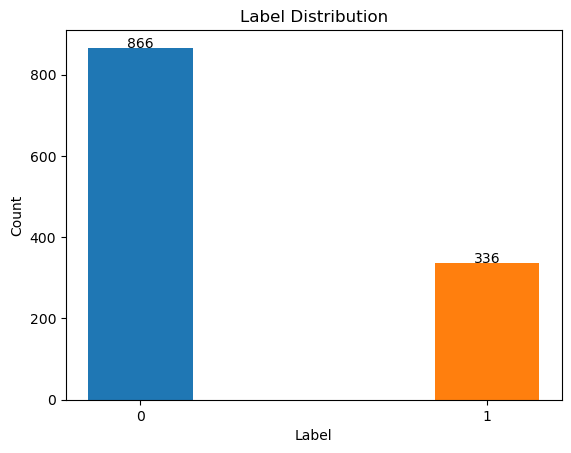

In [122]:
fig, ax = plt.subplots()
# 定义颜色字典
color_dict = {'0': 'tab:blue', '1': 'tab:orange'}

for label, count in label_counts.items():
    label = str(label)
    ax.bar(label, count, color=color_dict[label],width=0.3)
    
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
for i, v in enumerate(label_counts):
    plt.text(i, v+1, str(v), ha='center')
plt.show()